# Amazon Food Reivew : Exploratory Data Analysis 

There are a total of 56,8454 record and 10 variables in this dataset.     
In this EDA, we
- create levels in variables
- generate word cloud for sense of the review
- show distribution of the variables
- explore relationship between variables.


## Loading the data

In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv('Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


The variable ProfileName and Summary has missing value. There are 27 missing value in summarry variable and 16 missing value in ProfileName, but the missing values are relative small compare to the whole dataset, thus there is no need to worry about the missing value in this dataset.    
    
There are 36,3122 records that the Score equal to 5 which is higher than the rest of reviews scores. In addition, when dividing the records into positive which Score is greater than 3 and negative which Score is less than 3, more positive review than negative review.    To be more specific, there are 44,3777 records are positive and 12,4677 records are negative.
    
The word could is givien for a sense of the review. However, more precedures are needed to get a more precise wordcloud.       
      

## Data the Cleaning

Let's add the **Sentiment** column that turns the numeric score into either *positive* or *negative*.

Similarly, the **Usefulness** column turns the number of votes into a boolean.

In [4]:
# rename columns HelpfulnessNumerator and HelpfulnessDenominator to VotesHelpful and VotesTotal
#df.columns = ["Id", "ProductId", "UserId", "ProfileName", "VotesHelpful",
#              "VotesTotal", "Score", "Time", "Summary", "Text"]

In [5]:
df["Sentiment"] = df["Score"].apply(lambda score: "positive" if score > 3 else "negative")

We can use HelpfulnessNumerator and HelpfulnessDenominator to create level of useful

In [6]:
df["Usefulness"] = (df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]).apply\
    (lambda n: ">75%(very helpful)" if n > 0.75 
         else ("<25% (little helpful)" if n < 0.25
               else ("25%-75% (helpful)" if n >= 0.25 and n <= 0.75
                     else "=0 (useless)")))

Then we category reviewers' frequency

In [7]:
n = df.UserId.value_counts()
df['UserFrequency'] = df['UserId'].apply \
    (lambda counts: 'frequent reviewer (>100 reviews)' if n[counts] > 100 
            else 'Not frequent reviewer (0-100 reviews)')

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Usefulness,UserFrequency
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive,>75%(very helpful),Not frequent reviewer (0-100 reviews)
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative,=0 (useless),Not frequent reviewer (0-100 reviews)
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive,>75%(very helpful),Not frequent reviewer (0-100 reviews)
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative,>75%(very helpful),Not frequent reviewer (0-100 reviews)
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive,=0 (useless),Not frequent reviewer (0-100 reviews)


Let's select some subcolumns

In [9]:
df = df[['Id', 'Score', 'Summary', 'Sentiment', 'Usefulness', 'UserFrequency']]
df.head()

,Id,Score,Summary,Sentiment,Usefulness,UserFrequency
0,1,5,Good Quality Dog Food,positive,>75%(very helpful),Not frequent reviewer (0-100 reviews)
1,2,1,Not as Advertised,negative,=0 (useless),Not frequent reviewer (0-100 reviews)
2,3,4,"""Delight"" says it all",positive,>75%(very helpful),Not frequent reviewer (0-100 reviews)
3,4,2,Cough Medicine,negative,>75%(very helpful),Not frequent reviewer (0-100 reviews)
4,5,5,Great taffy,positive,=0 (useless),Not frequent reviewer (0-100 reviews)


ket's look at some 5s:

In [10]:
df[df.Score == 5].head(5)

,Id,Score,Summary,Sentiment,Usefulness,UserFrequency
0,1,5,Good Quality Dog Food,positive,>75%(very helpful),Not frequent reviewer (0-100 reviews)
4,5,5,Great taffy,positive,=0 (useless),Not frequent reviewer (0-100 reviews)
6,7,5,Great! Just as good as the expensive brands!,positive,=0 (useless),Not frequent reviewer (0-100 reviews)
7,8,5,"Wonderful, tasty taffy",positive,=0 (useless),Not frequent reviewer (0-100 reviews)
8,9,5,Yay Barley,positive,>75%(very helpful),Not frequent reviewer (0-100 reviews)


and some 1s as well:

In [11]:
df[df.Score == 1].head(5)

,Id,Score,Summary,Sentiment,Usefulness,UserFrequency
1,2,1,Not as Advertised,negative,=0 (useless),Not frequent reviewer (0-100 reviews)
12,13,1,My Cats Are Not Fans of the New Food,negative,>75%(very helpful),Not frequent reviewer (0-100 reviews)
26,27,1,Nasty No flavor,negative,<25% (little helpful),Not frequent reviewer (0-100 reviews)
50,51,1,Don't like it,negative,<25% (little helpful),Not frequent reviewer (0-100 reviews)
62,63,1,stale product.,negative,>75%(very helpful),Not frequent reviewer (0-100 reviews)


To format our data and build the Term-doc incidence matrix, many operations will be performed on the data :

- Stop words removal
- Stemming
- Punctuations
- Lowering

### Stopwords
* A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

![alt text](https://www.geeksforgeeks.org/wp-content/uploads/Stop-word-removal-using-NLTK.png)

In [12]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
'not' in stop

True

Since not is an important word in the review, thus  **we will not use stopwords removal for the modeling**

### stemming

In [14]:
# Stemmers remove morphological affixes from words, leaving only the word stem.
from nltk.stem import SnowballStemmer 
snow = SnowballStemmer('english')

let's test a few

In [15]:
print(snow.stem('tasty'))
print(snow.stem('joined'))
print(snow.stem('apples'))

tasti
join
appl


### punctuations removal

In [16]:
# remove the punctuation from the sentense
import re

test to see how it works

In [17]:
sentence = "I'd like to have some coffee today!"
sentence = re.sub(r'[\'|"|#]', r'', sentence) # remove these punctuation
sentence = re.sub(r'[?|!|.|,|)|(|\|/]',r' ',sentence) # replace these punctuation with space

In [18]:
str(sentence)

'Id like to have some coffee today '

### Combine - write a function

In [19]:
def cleanup(sentence):
    sentence = str(sentence) #convert the sentence to string
    sentence = sentence.lower() #lower the case
    sentence = re.sub(r'[\'|"|#]', r'', sentence) # remove these punctuation
    sentence = re.sub(r'[?|!|.|,|)|(|\|/]',r' ',sentence) # replace these punctuation with space

    tokens = sentence.split()
    out = []
    for t in tokens:
        out.append(snow.stem(t))
    out = " ".join(out) #use space to join all token and make them become one object
    out = re.sub(r'[\'|"|#]', r'', out) # remove these punctuation
    return out     

Again, we do not use stopwords removal, since stopwords like 'not' for example ,have strong negative signal.      
Let's test a few:

In [20]:
print(cleanup('How are you today?'))
print(cleanup('Not as I expected!'))
print(cleanup(35))

how are you today
not as i expect
35


We can apply the cleanup to clean 2 variables: summary and text.      
Let's apply the cleanup on summary variable

In [21]:
import time
start = time.time()

df['Summary_Clean'] = df['Summary'].apply(cleanup)

end = time.time()
print(f'runtime of the program is {end - start}')

runtime of the program is 199.95684123039246


#### Let's Create a Cloud Word

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=None,
#        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

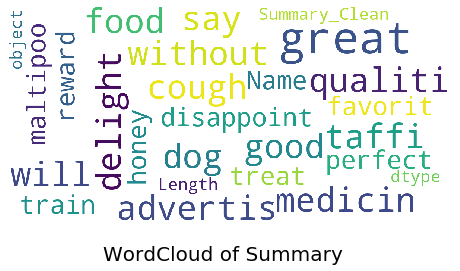

In [23]:
show_wordcloud(df['Summary_Clean'], title = "WordCloud of Summary")

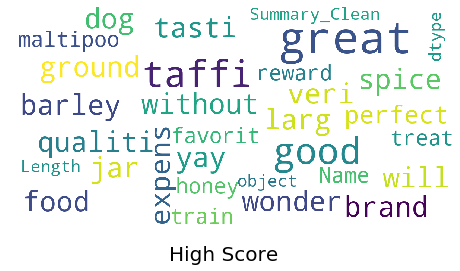

In [24]:
show_wordcloud(df['Summary_Clean'].loc[df.Score == 5], title = "High Score")

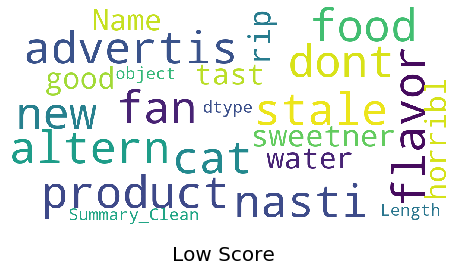

In [25]:
show_wordcloud(df['Summary_Clean'].loc[df.Score == 1], title = "Low Score")

## Exploratory Data Analysis

let's take a look at the dataframe after cleaning and we will conduct EDA on this datafarme

In [26]:
df.head()

,Id,Score,Summary,Sentiment,Usefulness,UserFrequency,Summary_Clean
0,1,5,Good Quality Dog Food,positive,>75%(very helpful),Not frequent reviewer (0-100 reviews),good qualiti dog food
1,2,1,Not as Advertised,negative,=0 (useless),Not frequent reviewer (0-100 reviews),not as advertis
2,3,4,"""Delight"" says it all",positive,>75%(very helpful),Not frequent reviewer (0-100 reviews),delight say it all
3,4,2,Cough Medicine,negative,>75%(very helpful),Not frequent reviewer (0-100 reviews),cough medicin
4,5,5,Great taffy,positive,=0 (useless),Not frequent reviewer (0-100 reviews),great taffi


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df.shape # data shape

(568454, 7)

In [29]:
df.nunique() # check num of unique items per column

Id               568454
Score                 5
Summary          295742
Sentiment             2
Usefulness            4
UserFrequency         2
Summary_Clean    251501
dtype: int64

In [30]:
#df.isnull().any()

In [31]:
df.isnull().sum()

Id                0
Score             0
Summary          27
Sentiment         0
Usefulness        0
UserFrequency     0
Summary_Clean     0
dtype: int64

In [32]:
df['Score'].describe()

count    568454.000000
mean          4.183199
std           1.310436
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Score, dtype: float64

#### Score

In [33]:
print(df['Score'].value_counts())

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64


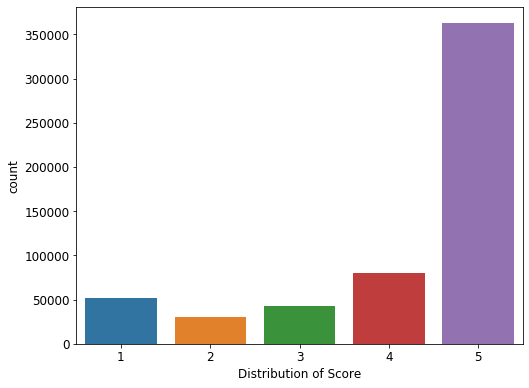

In [34]:
plt.figure()
sns.countplot(df['Score'])
plt.xlabel('Distribution of Score')
plt.show()

#### Sentiment

In [35]:
print(df['Sentiment'].value_counts())

positive    443777
negative    124677
Name: Sentiment, dtype: int64


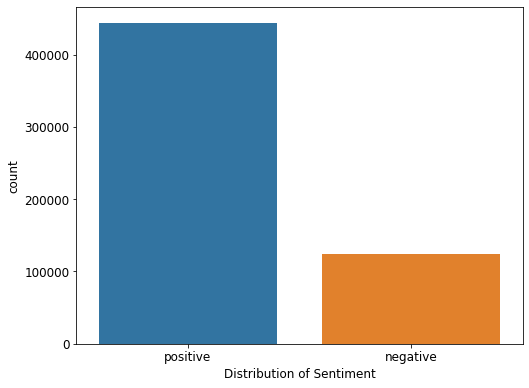

In [36]:
plt.figure()
sns.countplot(df['Sentiment'])
plt.xlabel('Distribution of Sentiment')
plt.show()

#### Usefulness

In [37]:
df.Usefulness.value_counts()

=0 (useless)             270052
>75%(very helpful)       202836
25%-75% (helpful)         57286
<25% (little helpful)     38280
Name: Usefulness, dtype: int64

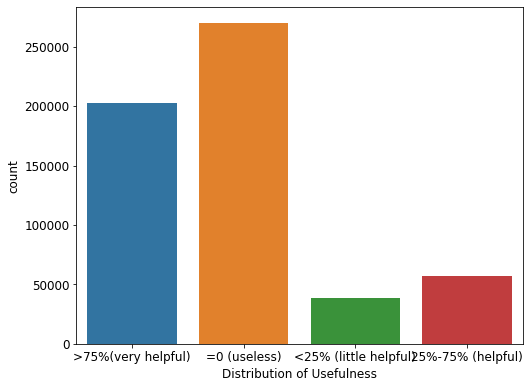

In [38]:
plt.figure()
sns.countplot(df['Usefulness'])
plt.xlabel('Distribution of Usefulness')
plt.show()

#### Frequency of reviewers

In [39]:
df.UserFrequency.value_counts()

Not frequent reviewer (0-100 reviews)    558778
frequent reviewer (>100 reviews)           9676
Name: UserFrequency, dtype: int64

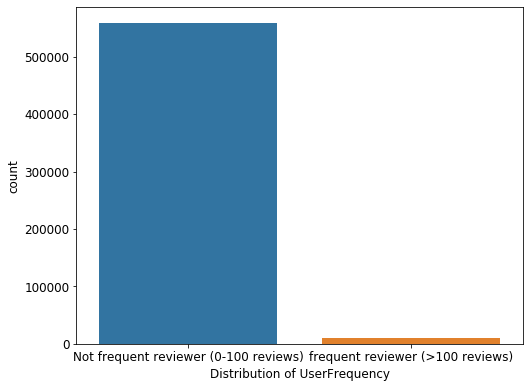

In [40]:
sns.countplot(df.UserFrequency)
plt.xlabel('Distribution of UserFrequency')
plt.show()

#### Are positive reveiws more helpful?

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

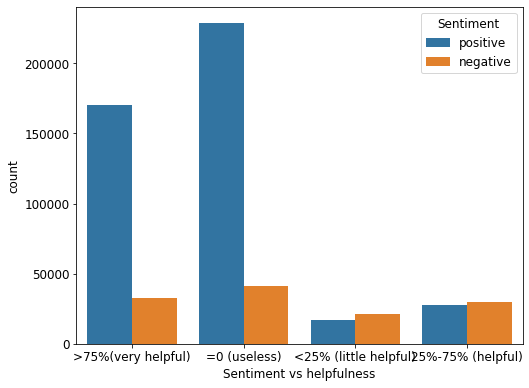

In [42]:
sns.countplot(x = df['Usefulness'], hue = df['Sentiment'])

plt.xlabel('Sentiment vs helpfulness')
plt.show()

#### Are frequent reveiws more helpful?

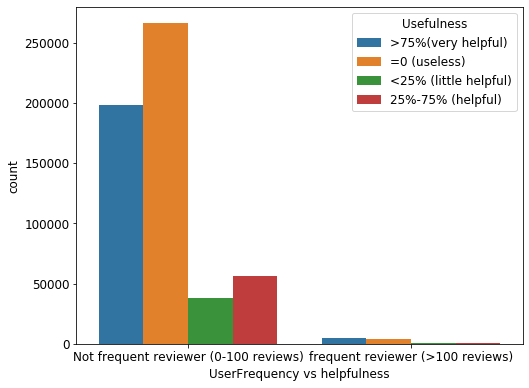

In [43]:
sns.countplot(x = df['UserFrequency'], hue = df['Usefulness'])

plt.xlabel('UserFrequency vs helpfulness')
plt.show()

## Conclusion
1. The variable ProfileName and Summary have missing values.        
2. There are 27 missing values in the summary variable and 16 missing values in ProfileName. The missing values are relatively small compared to the whole dataset; thus, there is no need to worry about the missing values in this dataset.        
3. There are 36,3122 records that the Score equal to 5, which is higher than the rest of the review scores.       
4. There are more positive reviews (Score >3) than negative reviews (Score <3). To be more specific, there are 44,3777 positive reviews and 12,4677 negative reviews.        
5. In terms of frequency reviewers, there are more frequent reviewers than non-frequent reviewers.       
6. The word could is given for a sense of the review.      
7. Without considering the no votes of the reviews' helpfulness, majority reviews are considered very helpful (>75%）     
8. There are more positive reviews than negative reviews within the category of very helpful reviews (>75%), but less positive reviews than negative reviews within the category of little helpful (<25% helpful) and helpful reviews (25%-75%).      